In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Decision Tree'

In [3]:
my_data=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\drug200.csv',delimiter=',')
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
#Preprocessing the data into X: Feature Matrix and y:Target Matrix
X=my_data[['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
#converting drug types to numerical Values
from sklearn import preprocessing 
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1]=le_sex.transform(X[:,1])

In [6]:
le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2]=le_BP.transform(X[:,2])

In [7]:
le_Chol=preprocessing.LabelEncoder()
le_Chol.fit(['HIGH','NORMAL'])
X[:,3]=le_Chol.transform(X[:,3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [8]:
y=my_data["Drug"].values
y[0:5]

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY'], dtype=object)

In [9]:
#setting up decision tree
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
#modeling
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_trainset.shape,  y_testset.shape)

Train set: (140, 5) (140,)
Test set: (140, 5) (60,)


In [12]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
predTree=drugTree.predict(X_testset)
print(predTree[0:5])
print(y_testset[0:5])

['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']
['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("The Accuracy of the model is : " ,metrics.accuracy_score(y_testset,predTree))

The Accuracy of the model is :  0.9833333333333333


In [15]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.externals.six import StringIO
%matplotlib inline 

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


<Figure size 432x288 with 0 Axes>

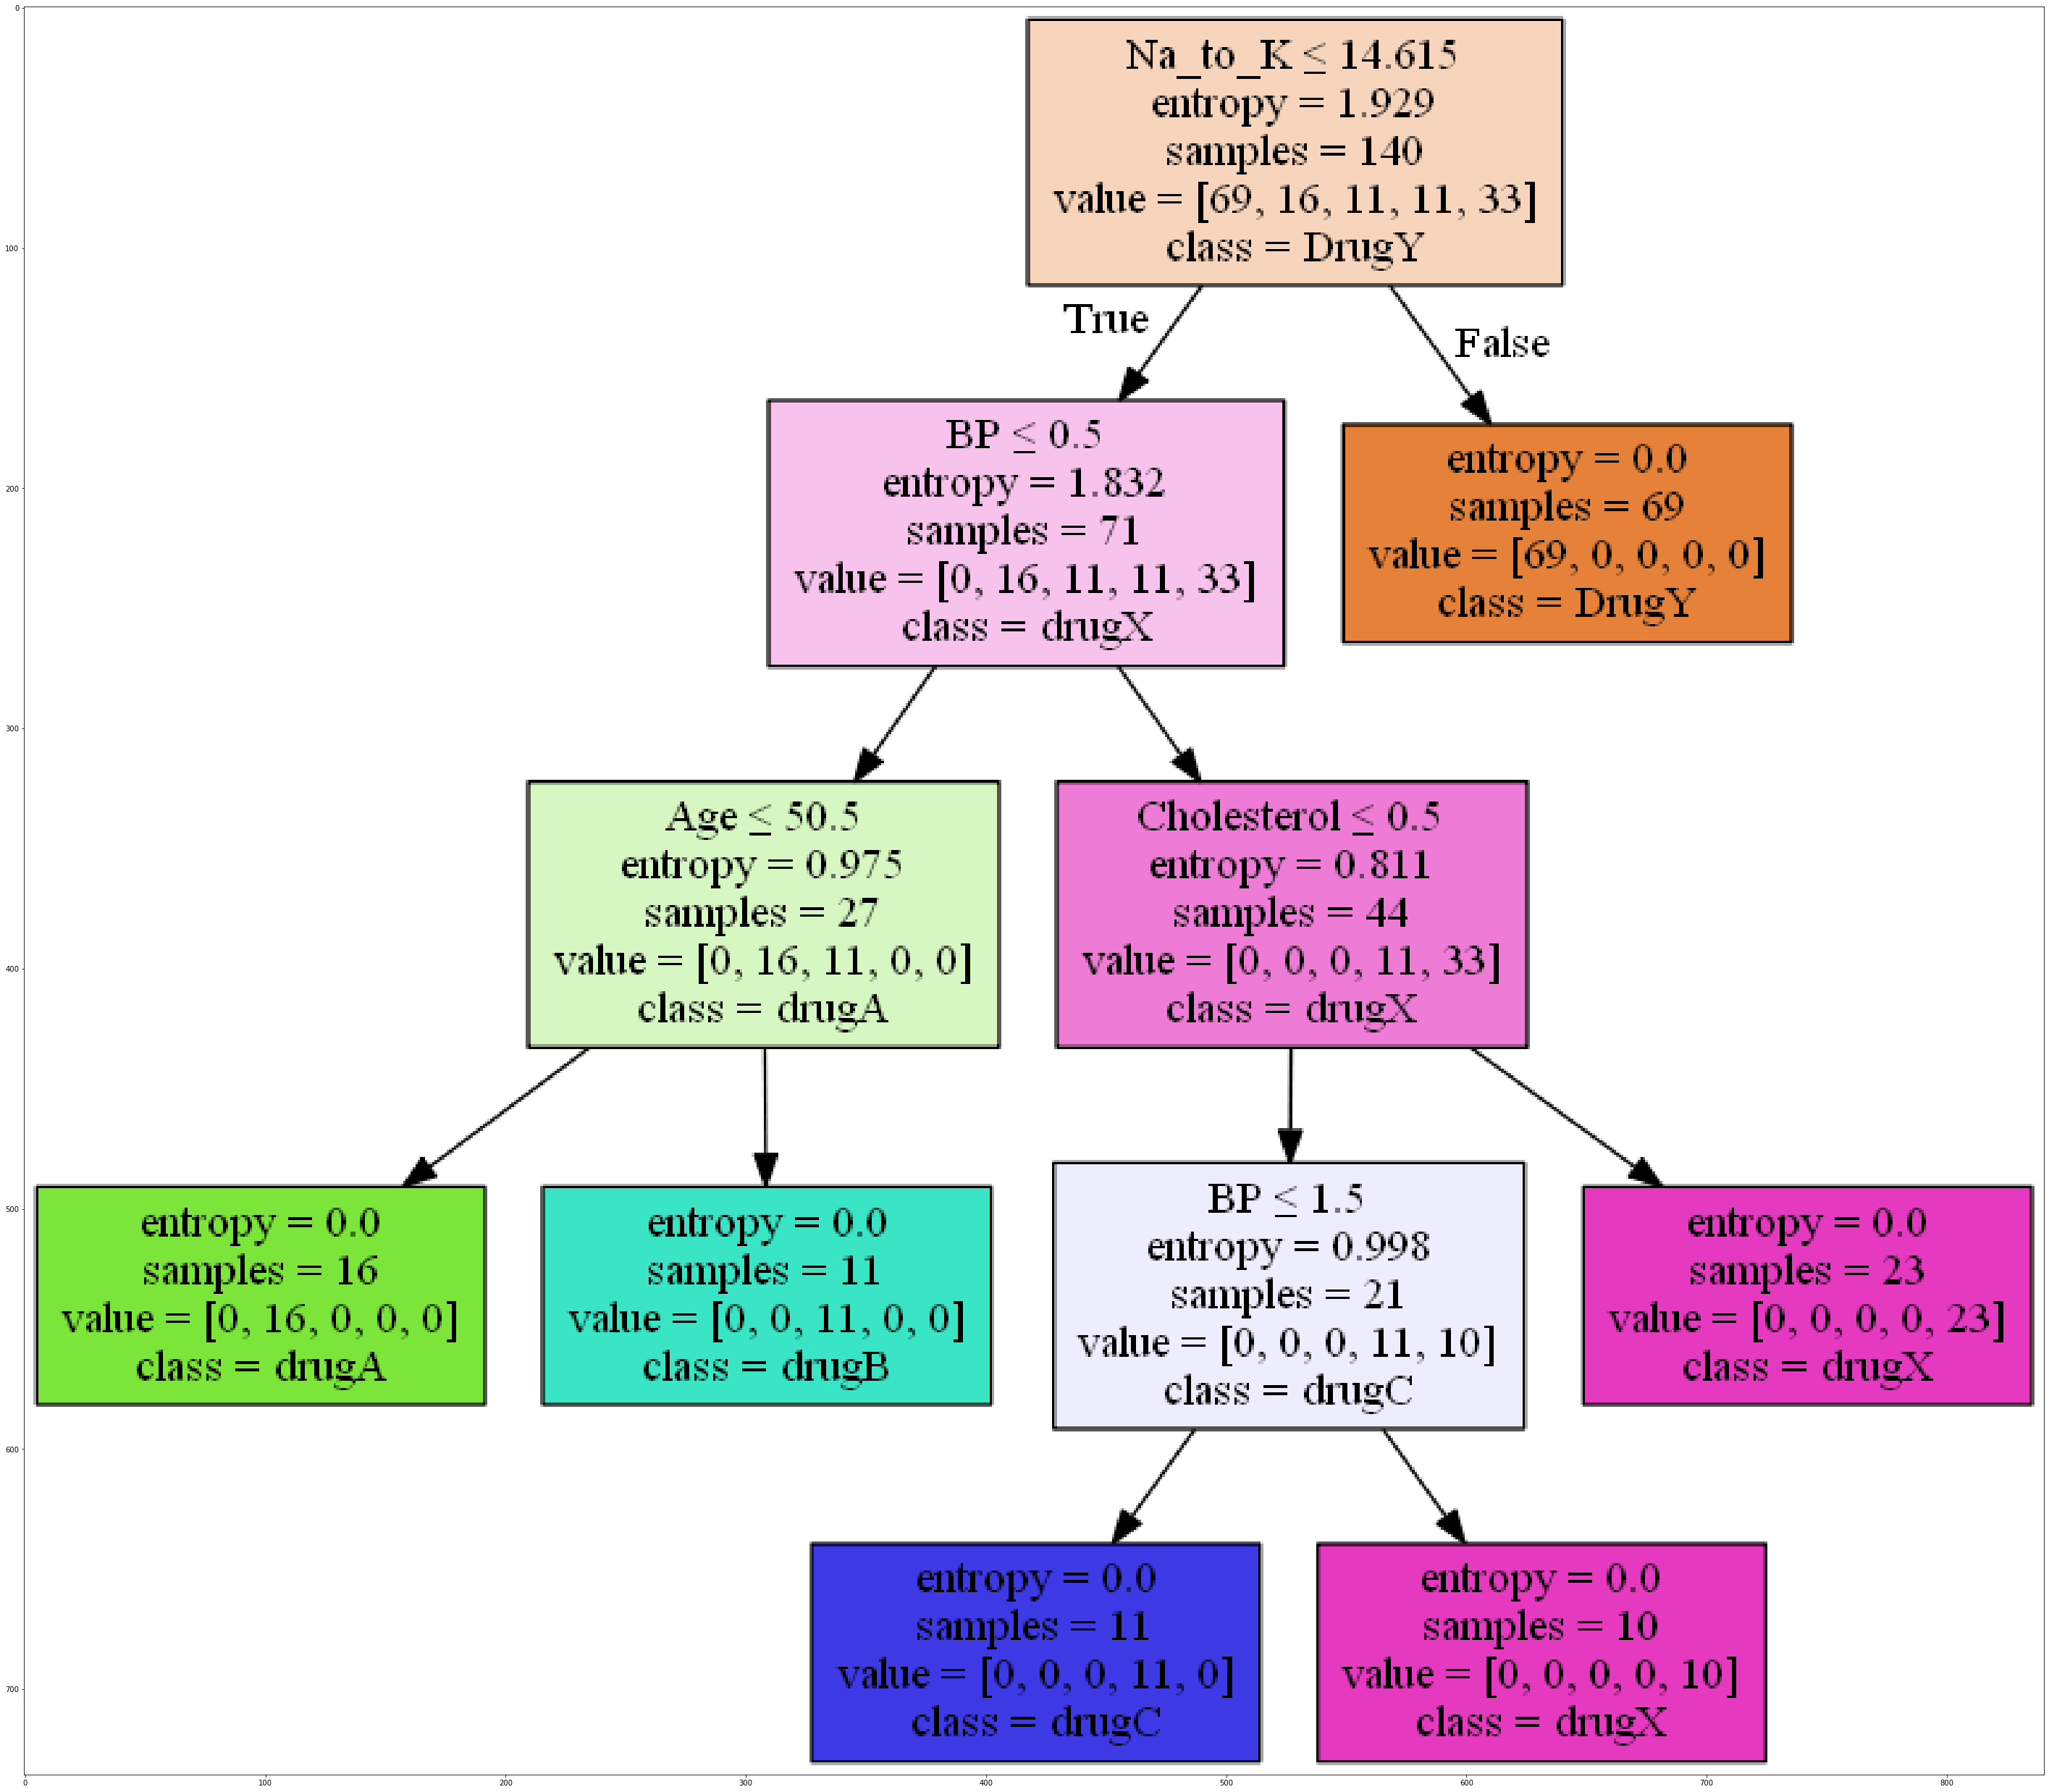

In [25]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
plt.clf()
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50,50))
plt.imshow(img,interpolation='nearest')
plt.show()